In [2]:
import torch
import numpy as np
from IPython.display import Audio as PyAudio, display


In [4]:
def gen_noise(zsc, max_size):
    noise = torch.randn([zsc, max_size])
    return np.fft.irfft(noise, max_size)

In [6]:
sample_rate = 44100
wave = gen_noise(1, 100000)
display(PyAudio(wave, rate=sample_rate, autoplay=False))

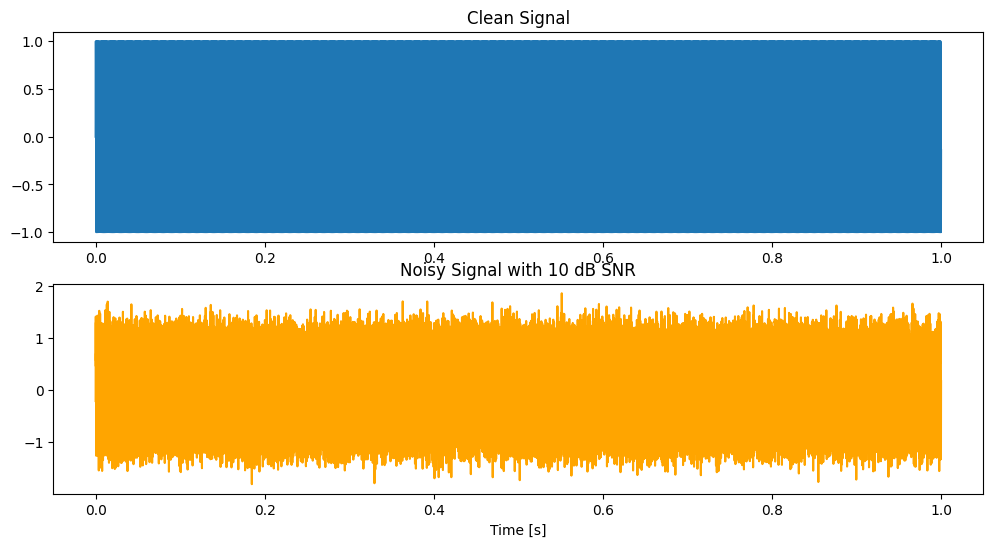

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
snr_db = 10  # Desired SNR in dB
duration = 1.0  # Signal duration in seconds
sampling_rate = 44100  # Samples per second
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Step 1: Generate a clean signal (e.g., a sine wave for illustration)
frequency = 1000  # Frequency of the sine wave
clean_signal = np.sin(2 * np.pi * frequency * t)

# Step 2: Calculate signal power and noise power based on the desired SNR
signal_power = np.mean(clean_signal ** 2)
snr_linear = 10 ** (snr_db / 10)  # Convert SNR from dB to linear scale
noise_power = signal_power / snr_linear

# Step 3: Generate white noise with calculated power
noise = np.random.normal(0, np.sqrt(noise_power), clean_signal.shape)

# Step 4: Combine the clean signal and noise to get the noisy signal
noisy_signal = clean_signal + noise

# Plot the clean and noisy signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, clean_signal, label="Clean Signal")
plt.title("Clean Signal")
plt.subplot(2, 1, 2)
plt.plot(t, noisy_signal, label="Noisy Signal (10 dB SNR)", color='orange')
plt.title("Noisy Signal with 10 dB SNR")
plt.xlabel("Time [s]")
plt.show()

In [15]:
def generate_white_noise(count, samples_count, noise_db=1, noise_dev=0):
    dbs = torch.normal(noise_db, noise_dev, size=(count, 1))
    noise_power_linear = 10 ** (dbs / 10)
    noise = torch.randn(count, samples_count)
    noise = noise * noise_power_linear
    return noise

In [18]:
generate_white_noise(10, 4, 15, 10)

tensor([[-24.5008, -46.3537, -18.7301,  82.8526],
        [-58.4833,  24.4200, -74.5608, -53.5618],
        [  4.5775,  -0.6861,   0.9694,   9.4909],
        [  0.8266,   0.6676,  -1.9536,  -1.0662],
        [ 12.6568,  14.6931,  16.9571,   9.7224],
        [-12.9273,  43.7337,   2.9268, -24.0294],
        [ -1.0234,  25.8816,  -1.6810,  16.4496],
        [ 22.7868,   6.9488, -10.9788,   3.9501],
        [  0.7929,  -0.3984,  -1.4317,  -0.2277],
        [  0.6387,  -7.6259,   0.9489,  -1.1686]])

In [18]:
batch_count = 10
n_examples = 4
print(np.linspace(0, batch_count-1, n_examples, dtype=int))

[0 3 6 9]
